
# **Visualisation and Statistical analysis of a Bank Marketing dataset using Python**

This dataset collected from the **UCI Repository**.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The Aim of this project is to identify factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit.

### **What is a Term Deposit?**

A **Term deposit** is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

First of all we'll use **Pandas** to read the data and to use specific methods for further analysis

**Numpy** for mathematical purposes and data conversion

**Matplotlib** & **Seaborn** for visualisation 

**SckitLearn** for Machine learning

##**Input variables**

###**Bank client data :**
* **age**

* **job** : type of job admin ('blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

* **marital** : marital status ('divorced', 'married', 'single', 'unknown';  note: 'divorced' means divorced or widowed)

* **education** :( 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

* **default** : has credit in default? ('no', 'yes', 'unknown')

* **housing** : has housing loan? ('no', 'yes', 'unknown')

* **loan** : has personal loan? ('no', 'yes', 'unknown')

###**Related with the last contact of the current campaign :**

* **contact** : contact communication type ('cellular', 'telephone')

* **day** : last contact day(1,2,....31)

* **month** : last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')

* **duration** : last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###**Other attributes :**

* **campaign** : number of contacts performed during this campaign and for this client includes last contact

* **pdays** : number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

* **previous** : number of contacts performed before this campaign and for this client

* **poutcome** : outcome of the previous marketing campaign ('failure', 'nonexistent', 'success')

###**Output variable :**

* **y** - has the client subscribed a term deposit? ('yes', 'no')

### **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bank-full.csv')
add_df = pd.read_csv('bank.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
add_df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


From UCI Repository we get to know that

* bank-full.csv with all examples and 17 inputs, ordered by date
* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3

As mentioned **bank-full.csv** has all examples, there is no need to merge them.

## **Basic Exploration and Cleaning up**

As expected it is raw data, now we will convert this into usable form.

In [ ]:
df = pd.read_csv('bank-full.csv' , sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Shape of dataframe
df.shape

(45211, 17)

Here this dataset contains 45211 rows and 17 columns

In [ ]:
# Checking datatypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We are having 7 int64 and 10 object datatypes

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#renaming the columns whcih are not appropriate

df.rename(columns = {'default':'d_credit','housing':'h_loan', 'loan':'p_loan','campaign':'presentc','previous':'previousc', 'y':'deposit'},inplace = True)
df

,age,job,marital,education,d_credit,balance,h_loan,p_loan,contact,day,month,duration,presentc,pdays,previousc,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


* **housing** feature means housing loan and **loan** feature means personal loan, doesn't make sense right so changed them to **h_loan** and **p_loan** 
* **y** doesn't mean anything so changing it to related column name as **deposit**
* **default** actually gives us the information whether the customer have credit in default or not, so changing it as **d_credit**(default credit)
* **campaign** means number of contacts performed during this campaign so changing it as **presentc** (present campaign contacts)
* **previous** means number of contacts performed before this campaign
so changing it as **previousc** (previous campaign contacts)

In [ ]:
#Statistical measures of the data
df.describe()

,age,balance,day,duration,presentc,pdays,previousc
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#Checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
d_credit     0
balance      0
h_loan       0
p_loan       0
contact      0
day          0
month        0
duration     0
presentc     0
pdays        0
previousc    0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#Checking duplicates
df.duplicated().sum()

0

Fortunately,
* No missing values
* No duplicates 

In [ ]:
# Changing duration in seconds to minutes 
df['duration'] = df.duration /60

In [ ]:
df.head()

,age,job,marital,education,d_credit,balance,h_loan,p_loan,contact,day,month,duration,presentc,pdays,previousc,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no


See how it make sense!! 

### **Data Visualisation**

In [ ]:
# A small step to proceed further to ignore future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

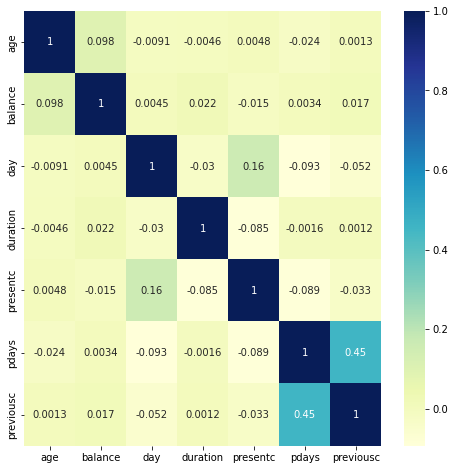

In [ ]:
# HeatMap
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

* We don't have even one feature with above 0.5 correlation
* **previousc** and **pdays** are highly correlated(0.45) features we have


In [ ]:
# Here I'm splitting the dataset on the basis of y variable i.e., yes or no categories 
df1 = df[df.deposit == 'yes']
df2 = df[df.deposit == 'no']

In [ ]:
print("Total Number of clients who have subscribed for their Term Deposits are",len(df1))
print("Total Number of clients who have NOT subscribed for their Term Deposits are", len(df2))

Total Number of clients who have subscribed for their Term Deposits are 5289
Total Number of clients who have NOT subscribed for their Term Deposits are 39922


In [ ]:
# Calculating the percentages
print('Percentage of deposited clients : ',len(df1)*100/len(df2),'%')
print('Percentage of non-deposited clients : ',100-len(df1)*100/len(df2),'%')

Percentage of deposited clients :  13.248334251790993 %
Percentage of non-deposited clients :  86.751665748209 %


Text(0.5, 1.0, 'Count of term deposit')

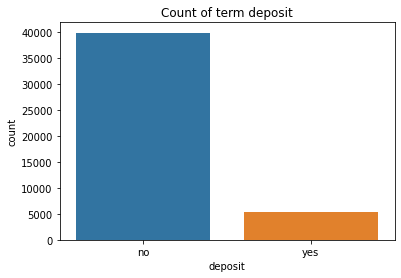

In [ ]:
sns.countplot(x = df.deposit)
plt.title('Count of term deposit')

We can clearly see the drastic difference between these... 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


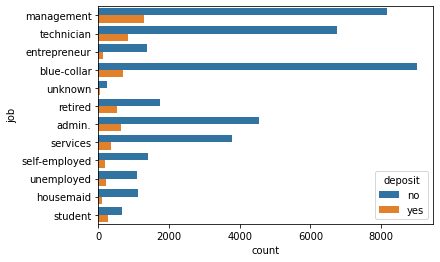

In [ ]:
# Analysing Job Variable and drawing the Frequency table
print(df['job'].value_counts())

sns.countplot(y = df.job, hue = df.deposit)

In [ ]:
# Creating a function to make our job easier
# Default hue is deposit feature 
def countplot(A):
  sns.countplot(x = A,hue = df.deposit)
  plt.show()

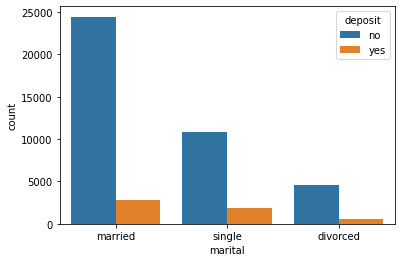

In [ ]:
countplot(df.marital)

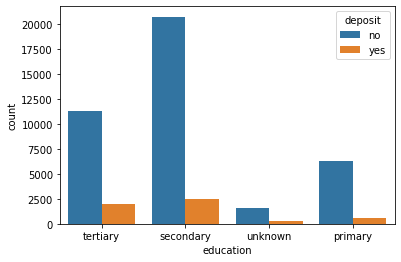

In [ ]:
countplot(df.education)

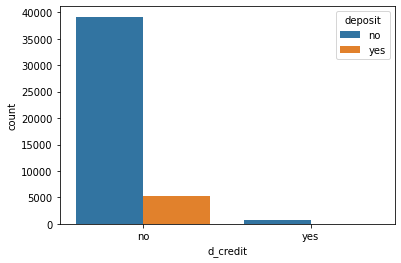

In [ ]:
countplot(df.d_credit)

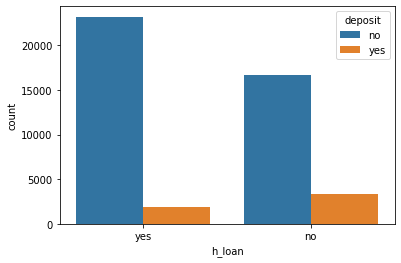

In [ ]:
countplot(df.h_loan)

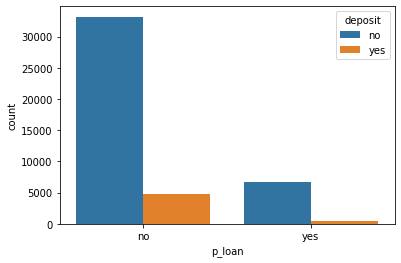

In [ ]:
countplot(df.p_loan)

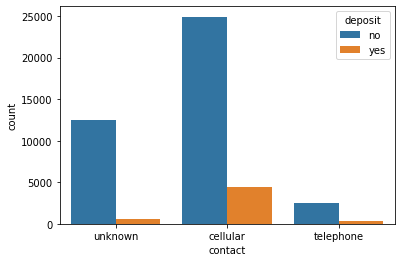

In [ ]:
countplot(df.contact)

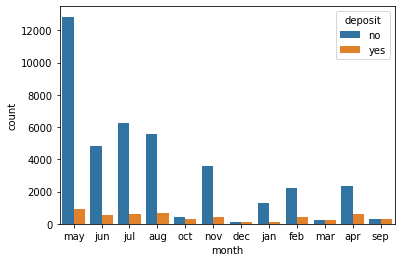

In [ ]:
countplot(df.month)

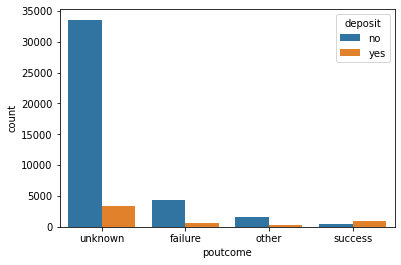

In [ ]:
countplot(df.poutcome)

**Findings -** 

* Client with job type as blue-collar, management records are high in given dataset and student are very less 
* Client who married are high in records in given dataset and divorced are less
* Client with secondary education background are high in numbers in the given dataset
* Data in month of may is high and less in december.


**Findings with respective to deposit feature -** 
* Client with jobtype as management has high interest on deposit
* Client who has housing loan seems to be not interested much on deposit
* In month of april, may, june and july banks having significant count of deposits through clients(summer season)
* In month of may, records are high but client interest ratio is very less
* In the **d_credit** feature unknown values are minimal and we have massive clients who haven't done term deposit(**unknown**) in previous campaign

As we know the majority of clients haven't done term deposit, we can sense something bias is there. Let's figure it out.

### **Let's see the distribution of our features**

In [ ]:
df

,age,job,marital,education,d_credit,balance,h_loan,p_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600000,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.466667,4,-1,0,unknown,no


In [ ]:
# Again creating a function to see the distribution
def distplot(A):
  sns.distplot(x = A)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


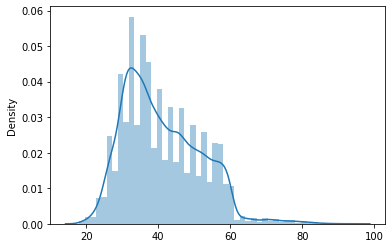

In [ ]:
distplot(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


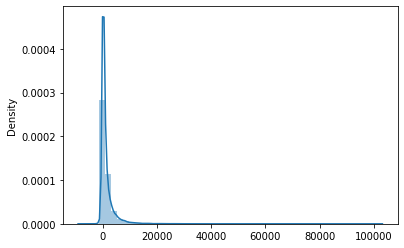

In [ ]:
distplot(df.balance)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


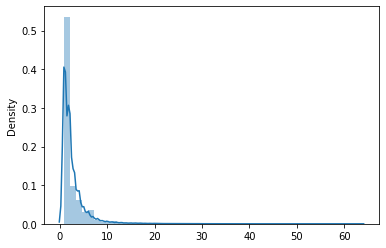

In [ ]:
distplot(df.presentc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


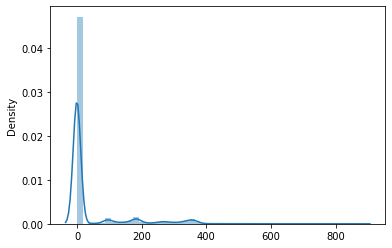

In [ ]:
distplot(df.pdays)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


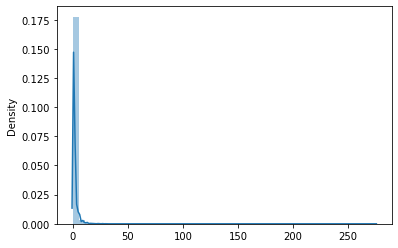

In [ ]:
distplot(df.previousc)

All the above plots are skewed, Let's get into more details.

In [ ]:
df

,age,job,marital,education,d_credit,balance,h_loan,p_loan,contact,day,month,duration,presentc,pdays,previousc,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600000,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.466667,4,-1,0,unknown,no


**Checking out outliers...**

In [ ]:
# Outlier Detection
def boxplot(A,B):
  sns.boxplot(x = A, y = B, data=df)
  plt.show()

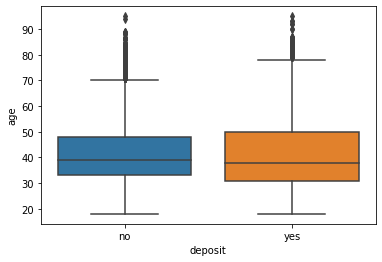

In [ ]:
boxplot(df.deposit,df.age)

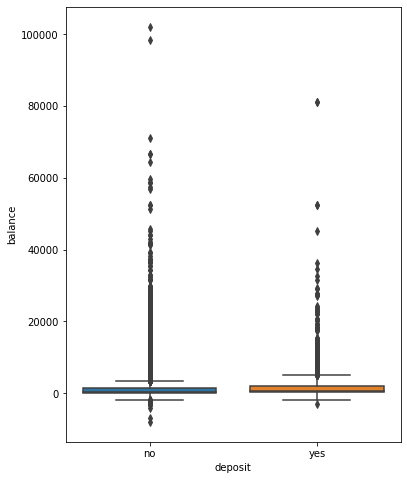

In [ ]:
plt.figure(figsize = (6,8))
boxplot(df.deposit,df.balance)

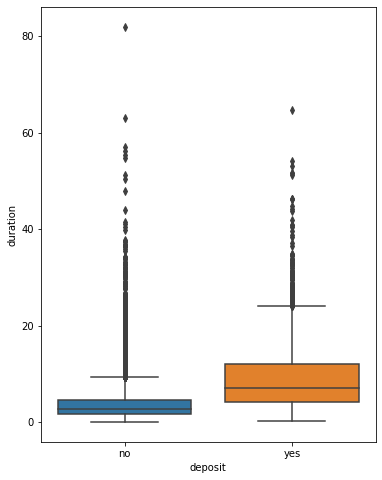

In [ ]:
plt.figure(figsize = (6,8))
boxplot(df.deposit,df.duration)

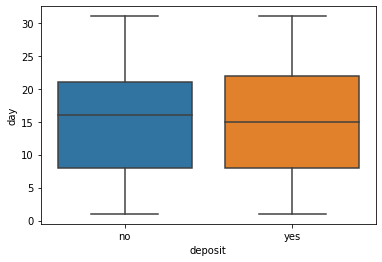

In [ ]:
boxplot(df.deposit,df.day)

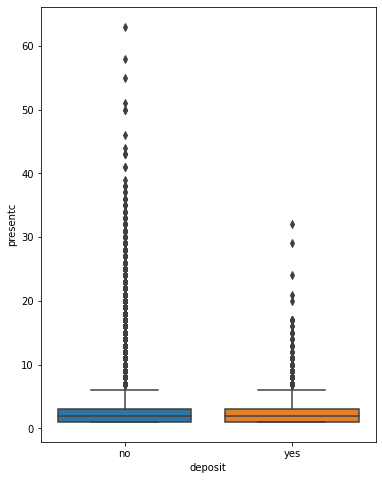

In [ ]:
plt.figure(figsize = (6,8))
boxplot(df.deposit,df.presentc)

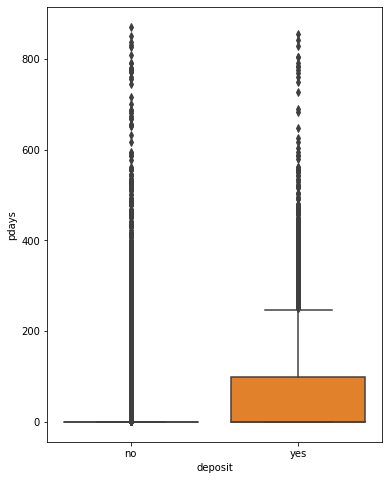

In [ ]:
plt.figure(figsize = (6,8))
boxplot(df.deposit,df.pdays)

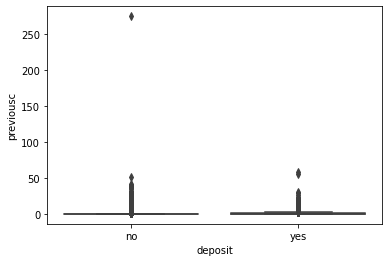

In [ ]:
boxplot(df.deposit,df.previousc)

Massive outliers detected in above features except **day**

We will deal this later...

The only concern around this anaylsis is why we have lot of clients with no term deposit.

let's find out this

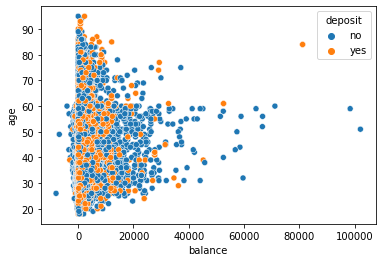

In [ ]:
sns.scatterplot(x = df.balance, y = df.age,hue = df.deposit)

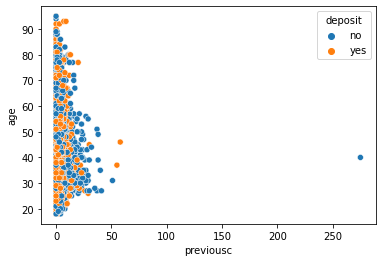

In [ ]:
#presentc - Number of contacts performed during this campaign and for this client includes last contact
sns.scatterplot(x = df.previousc, y = df.age,hue = df.deposit)   #fig1

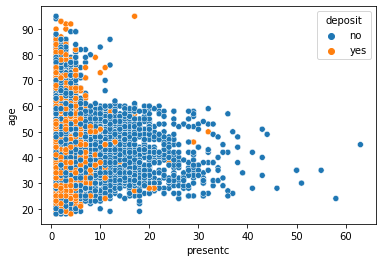

In [ ]:
sns.scatterplot(x = df.presentc, y = df.age,hue = df.deposit) #fig2

**Findings -**
* Most clients at all age groups are having bank balance less than 20000 and performed by below 10 contacts
* Most clients at all age groups who are having bank balance less than 15000 made term deposit  
* Age 25-60 are having higher balance and performed by many contacts


Age is not affecting the term deposits,clients those who are less contacted(below 10).
See the difference in present campaign(fig2) and previous campaign(fig1)
term deposits increased under 10 contacts, most of poeple from 25-60 have made no term deposit

**lets focus on those...**

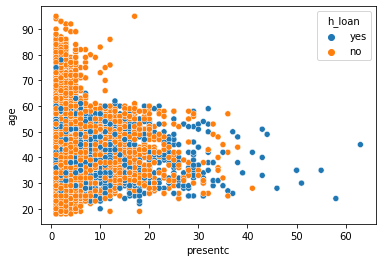

In [ ]:
sns.scatterplot(x = df.presentc, y = df.age,hue = df.h_loan)

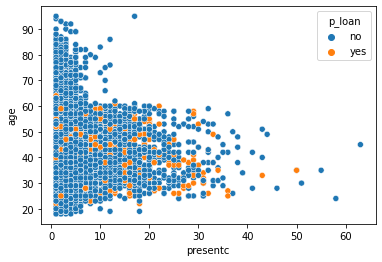

In [ ]:
sns.scatterplot(x = df.presentc, y = df.age,hue = df.p_loan)

See these clients(25-60 age) are having loans(personal & housing) that's why they haven't made term deposit even after receiving mutliple times communications with contacts 

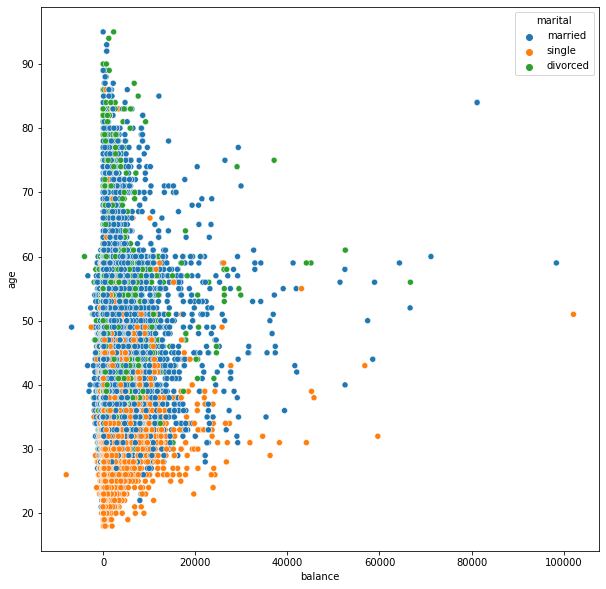

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x = df.balance, y = df.age,hue = df.marital)

* As usual most singles are under 30 age and most couples in ramge of 35-65 
* **balance** increases as **age** increasing...


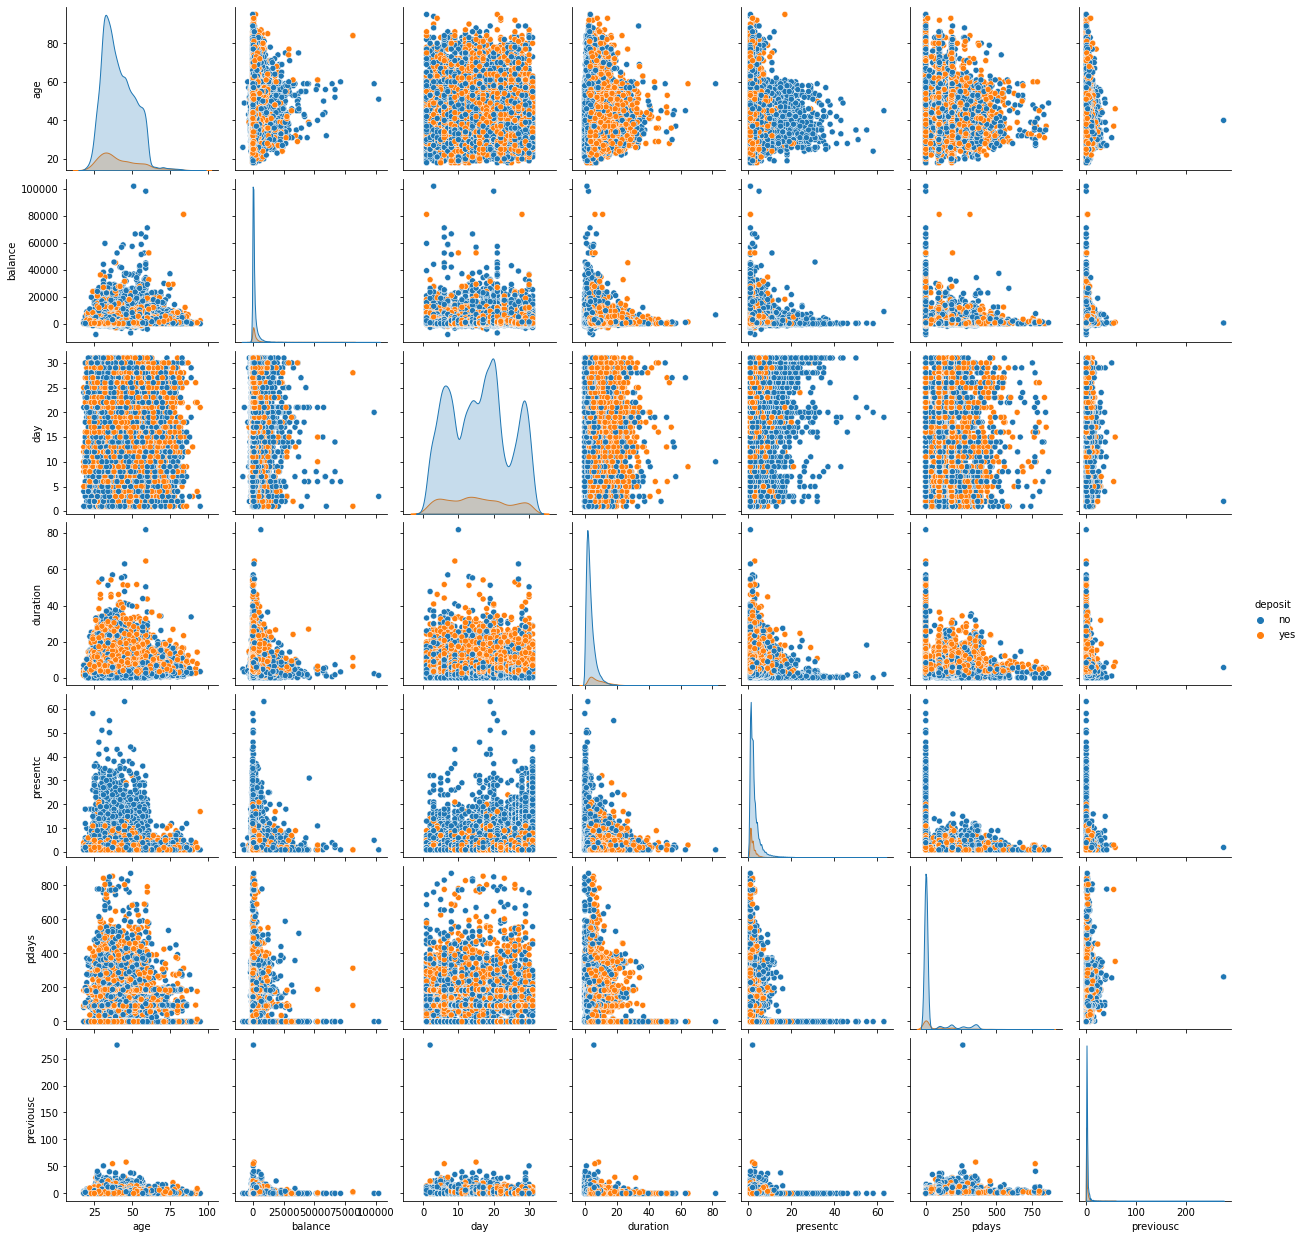

In [ ]:
sns.pairplot(df,hue = 'deposit')

# **Feature Engineering**

As per Exploratory data anaylsis **EDA**

* We found no missing values
* 10 categorical features 
* Outliers found in every numerical feature except day

### **Dealing with Ineffective features**

In [ ]:
df3 = df.copy()

In [ ]:
df3.groupby(['deposit','d_credit']).size()

deposit  d_credit
no       no          39159
         yes           763
yes      no           5237
         yes            52
dtype: int64

You can observe that over 98% of 'no' and this feature(**d_credit**) doesn't effect minimum so we are dropping this 

In [ ]:
df3.drop(['d_credit'],axis = 1,inplace  = True)

In [ ]:
df3

,age,job,marital,education,balance,h_loan,p_loan,contact,day,month,duration,presentc,pdays,previousc,poutcome,deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,16.283333,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,7.600000,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,8.466667,4,-1,0,unknown,no


In [ ]:
df3.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

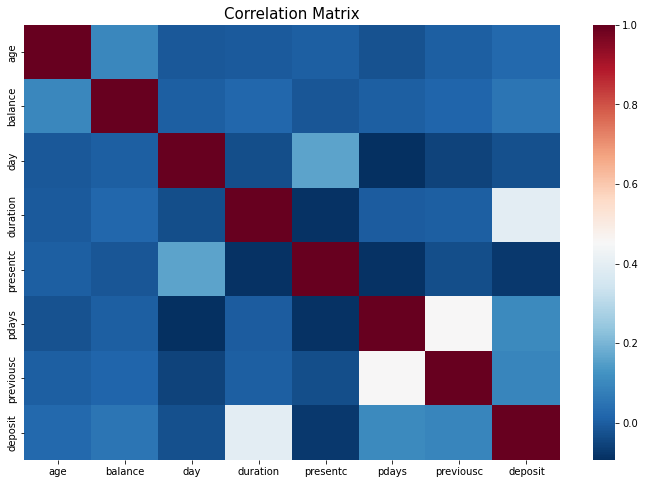

In [ ]:
#Feature selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

fig = plt.figure(figsize=(12,8))

df3['deposit'] = LabelEncoder().fit_transform(df3['deposit'])

sns.heatmap(df3.corr(), cbar = True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=15)
plt.show()

Now we can see the new correlation between duration and deposit as we know earlier

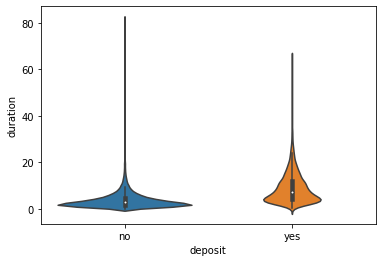

In [ ]:
# Example to see the relation between "deposit" and "duration" by Violin-plot
plt.rcParams['figure.figsize'] = (6,4)
sns.violinplot(x = "deposit", y = "duration", data = df)
plt.show()

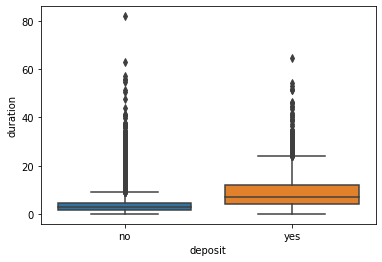

In [ ]:
# Example to see the relation between "deposit" and "duration" by Box-plot
sns.boxplot(x = "deposit", y = "duration", data = df)
plt.show()

As we could see that there is the significant correlation between "pdays" and "previous" from **correlation matrix** figure

Let's proceed further for standardization

### **PCA (Principal Components Analysis)**

In [ ]:
#Standardization

X = df3[['previousc','pdays']]
X = StandardScaler().fit_transform(X)
X

array([[-0.25194037, -0.41145311],
       [-0.25194037, -0.41145311],
       [-0.25194037, -0.41145311],
       ...,
       [ 1.05047333,  1.43618859],
       [-0.25194037, -0.41145311],
       [ 4.52357654,  1.4761376 ]])

In [ ]:
#Normalization
# from sklearn.preprocessing import MinMaxScaler
# X = df3[['previousc','pdays']]
# norm = MinMaxScaler()

# X = norm.fit_transform(X)
# X

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.01090909, 0.21215596],
       [0.        , 0.        ],
       [0.04      , 0.21674312]])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA()
fit=pca.fit(X)

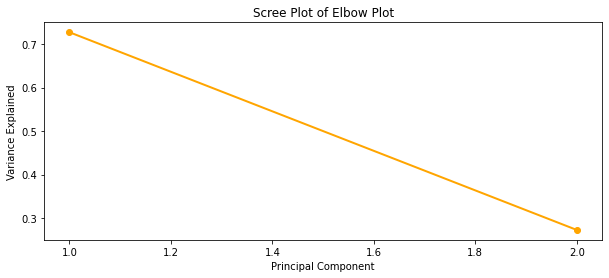

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10,4))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='orange')
plt.title('Scree Plot of Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Here we found sudden drop but nothing more to get so going ahead further 

In [ ]:
x_pca = df.loc[:, ['previousc','pdays']].values
x_pca = StandardScaler().fit_transform(x_pca)

In [ ]:
pca2 = PCA(n_components=2)

principalComponents = pca2.fit_transform(x_pca)
principalDF = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])

In [ ]:
pca2.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
pca2.explained_variance_ratio_

array([0.72740982, 0.27259018])

In [ ]:
# Concatenation of dataframes
df_all = pd.concat([principalDF, df3], axis=1)

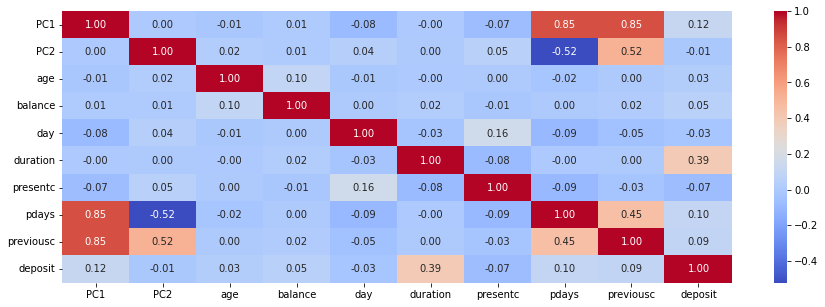

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df_all.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

**Observation -**

As we can see, PC1 (the first principal component) has better correlation with "pdays" and "previous" than "deposit".

### **Scale Numeric Data**

In [ ]:
num_cols = ['age', 'balance', 'day', 'presentc', 'pdays', 'previousc']
df3[num_cols] = StandardScaler().fit_transform(df3[num_cols])

df3.head()

,age,job,marital,education,balance,h_loan,p_loan,contact,day,month,duration,presentc,pdays,previousc,poutcome,deposit
0,1.606965,management,married,tertiary,0.256419,yes,no,unknown,-1.298476,may,4.350000,-0.569351,-0.411453,-0.25194,unknown,0
1,0.288529,technician,single,secondary,-0.437895,yes,no,unknown,-1.298476,may,2.516667,-0.569351,-0.411453,-0.25194,unknown,0
2,-0.747384,entrepreneur,married,secondary,-0.446762,yes,yes,unknown,-1.298476,may,1.266667,-0.569351,-0.411453,-0.25194,unknown,0
3,0.571051,blue-collar,married,unknown,0.047205,yes,no,unknown,-1.298476,may,1.533333,-0.569351,-0.411453,-0.25194,unknown,0
4,-0.747384,unknown,single,unknown,-0.447091,no,no,unknown,-1.298476,may,3.300000,-0.569351,-0.411453,-0.25194,unknown,0


### **Encode Categorical Value**

In [ ]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'd_credit', 'h_loan', 'p_loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df3[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df3 = df3.drop(cat_cols ,axis=1)
df3 = pd.concat([df_encoded, df3], axis=1)

print('Shape of dataframe:', df3.shape)
df3.head()

Shape of dataframe: (45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,presentc,pdays,previousc,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.606965,0.256419,-1.298476,4.350000,-0.569351,-0.411453,-0.25194,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.288529,-0.437895,-1.298476,2.516667,-0.569351,-0.411453,-0.25194,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.747384,-0.446762,-1.298476,1.266667,-0.569351,-0.411453,-0.25194,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.571051,0.047205,-1.298476,1.533333,-0.569351,-0.411453,-0.25194,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.747384,-0.447091,-1.298476,3.300000,-0.569351,-0.411453,-0.25194,0


### **Dowloading the Dataframe**

In [ ]:
from google.colab import files

df.to_csv('bank_df.csv', encoding = 'utf-8-sig') 
files.download('bank_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Solutions for the Next Marketing Campaign - Conclusion**

* **Highest Marketing Activity Season** - We saw that summer season has highest marketing activity and may is the highest marketing month.
for the next campaign banks should consider the rest of the months and escpecially december why it has lowest term deposits.

* **Contact** - As common as that,the more calls clients receive the more they rejects in other words they will hatred. Calls should be relevant (not more than 5 calls). Use alternative ways to remind them like notifications(via application),emails or sms.

* **Age** - Around 20's and 70's are more likely to subscribe term deposit, better focus more to get more subscriptions or focus on rest.

* **Occupation** - Related to above statement, mostly students and retired people are tend to subscribe term deposits. 

* **Loans and Balances** - Clients who are having house loans and personal loans are subscribing very low and mostly they are maintaining low bank balance. This suggests that clients are supposed to clear their debts and they are out of money to subscribe term deposits.Banks should consider and come up with another idea or reduce calls for those who are havings loans for their next campaign. Clients with high balances are more likely to subscribe term deposits.

* **Target Clients with a higher duration** - Since duration of the call highly impacting the Clients. Clients with above average duration has highly likelihood to open term deposit. Prepare a questionnaire and improve the duration.




**---   Build more strategies according to the above points, that will make the next campaign more effective than current one   ---** 